# Olympic Dataset Analysis(1896-2016)

### In this project we will analyze the dataset of olympic of year 1896 to 2016

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### 1. Loading Datasets

In [2]:
athletes = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### Let's take a look at the quick descriptive stats of the datasets on which we are going to work

In [5]:
athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### From the descriptive statistics we can conclude that:

- The age of the youngest player in olympic history was 10 years
- The shortest player ever played in an olympic was just 127 cm tall.
- The average age, height and width of olympians are 25 yrs old, 175 cm tall and 70 kg
- The age of eldest player in olympic history was 97 yrs old.
- The tallest player ever played in an olympic was just 226 cm tall.

### Let's join both the dataset

In [6]:
# Joining the datasets
df = athletes.merge(regions,how = 'left', on = 'NOC')

In [7]:
# Checking the shape of the dataset(rows and columns)
df.shape

(271116, 17)

In [8]:
# Column names
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

### 2. Cleaning Dataset


One thing that was noticed that the columns(region and notes) are not capitalized.

In [9]:
# Renaming the columns
df.rename(columns={'region': 'Region', 'notes':'Notes'}, inplace=1)
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')

In [10]:
# Checking for null values
NaN_values = df.isna()
Nan_columns = NaN_values.any()
Nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

### **The columns which are having True(shows that they have some NaN values in them) while those who have False(shows they don't have any NaN values)**

**Let's take a look at how many NaN values do they contain**

In [11]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

### We can see that in Medal column, the number of null values is way larger than the other columns:

- Reason: There are many players who participate in the olympic and do not win medals

In [12]:
# Print the list of those columns which contains at least one null value.
df.columns[df.isna().any()].tolist()

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [13]:
# Print out the details of only Indian athletes who have participated in Olympic
df.query('Team == "India"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [14]:
# Curious about Milkha Singh 
df.query('Name == "Milkha Singh"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
221116,111108,Milkha Singh,M,21.0,172.0,66.0,India,IND,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Men's 200 metres,NaN,India,NaN
221117,111108,Milkha Singh,M,21.0,172.0,66.0,India,IND,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Men's 400 metres,NaN,India,NaN
221118,111108,Milkha Singh,M,24.0,172.0,66.0,India,IND,1960 Summer,1960,Summer,Roma,Athletics,Athletics Men's 400 metres,NaN,India,NaN
221119,111108,Milkha Singh,M,28.0,172.0,66.0,India,IND,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Men's 4 x 400 metres Relay,NaN,India,NaN


In [15]:
# Comparison of India and Japan
Japan = df.query('Team=="Japan"').describe()
India = df.query('Team=="India"').describe()
print(Japan, India)

                  ID          Age       Height       Weight         Year
count    8289.000000  8173.000000  7408.000000  7348.000000  8289.000000
mean    81911.857522    24.423345   168.173326    63.215977  1983.835203
std     33529.498257     5.164253     9.381821    11.962552    23.903994
min       362.000000    11.000000   140.000000    28.000000  1912.000000
25%     56727.000000    21.000000   162.000000    56.000000  1968.000000
50%     84070.000000    24.000000   168.000000    62.000000  1988.000000
75%    116223.000000    27.000000   175.000000    70.000000  2004.000000
max    134133.000000    71.000000   208.000000   145.000000  2016.000000                   ID          Age      Height      Weight         Year
count    1400.000000  1250.000000  887.000000  865.000000  1400.000000
mean    76701.817143    25.508000  171.577227   67.682659  1978.825714
std     38073.641662     5.171705    9.582507   14.340968    26.931590
min       281.000000    15.000000  137.000000   43.000000  

### Some insights from above descriptive stats:

- The average age of Japan players is 24 yrs while in case of India is 25 yrs
- Indian players(171cm) are about 3 cm taller than that of Japanese players(168cm) on an average.
- Weights of Japanese players are around 63kg while Indians are around 67kg on an average

In [16]:
# Find the top 10 countries with participants rate (in terms of no of players have participated) since 1950
Top_10_countries = df.Team.value_counts().sort_values(ascending=False).head(10)
Top_10_countries

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: count, dtype: int64

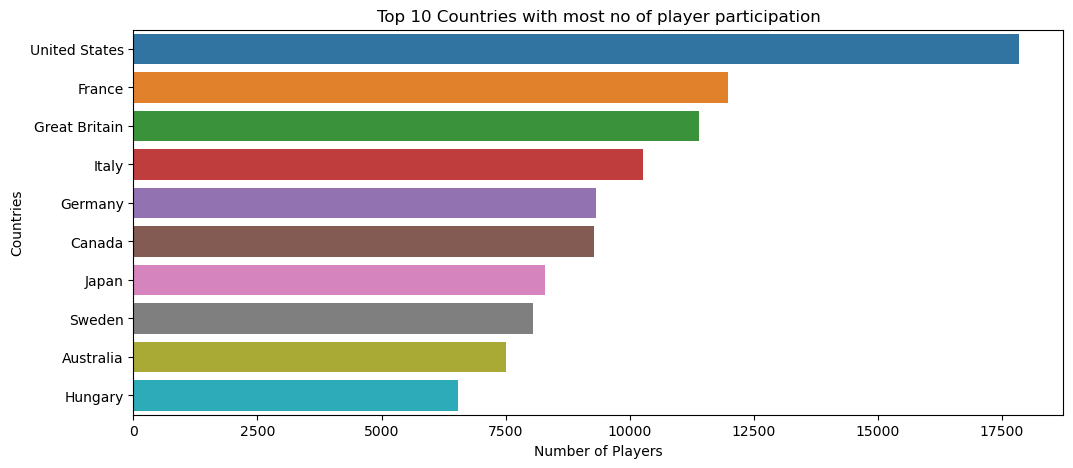

In [17]:
# Graphical Representation of Top 10 countries with most participation
plt.figure(figsize=(12,5))
sns.barplot(x=Top_10_countries, y=Top_10_countries.index)
plt.title('Top 10 Countries with most no of player participation')
plt.xlabel('Number of Players')
plt.ylabel('Countries')
plt.show()

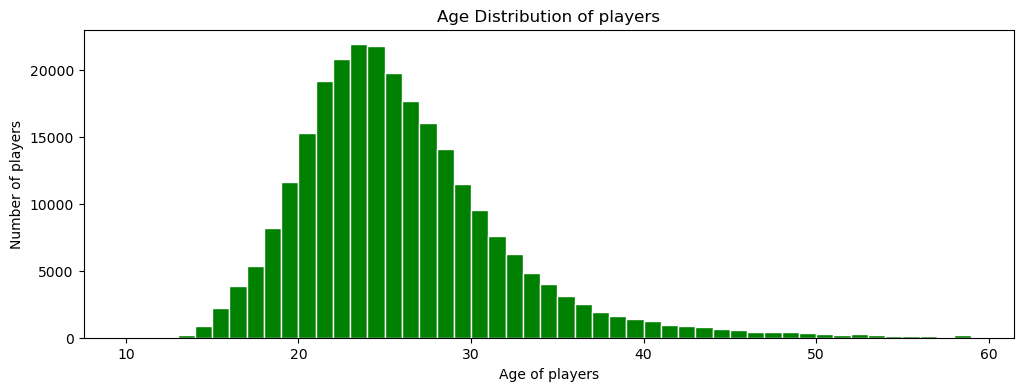

In [18]:
# Show the age distribution of players using histogram
plt.figure(figsize=(12,4))
plt.hist(df.Age, bins=np.arange(10,60), color='Green', edgecolor='white')
plt.title('Age Distribution of players')
plt.xlabel('Age of players')
plt.ylabel('Number of players')
plt.show()

In [19]:
# Print the name of sports played in winter olympic
winter_games = [df[df.Season=='Winter'].Sport.unique()]
for i in winter_games:
    print(i)

['Speed Skating' 'Cross Country Skiing' 'Ice Hockey' 'Biathlon'
 'Alpine Skiing' 'Luge' 'Bobsleigh' 'Figure Skating' 'Nordic Combined'
 'Freestyle Skiing' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Short Track Speed Skating' 'Skeleton' 'Military Ski Patrol' 'Alpinism']


In [20]:
# Print the name of sports played in summer olympic
summer_games = [df[df.Season=='Summer'].Sport.unique()]
for i in summer_games:
    print(i)

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics']


In [21]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [22]:
# Ratio of Male vs Female participant in the olympic history

male_count = df['Sex'][df.Sex == 'M'].count()
female_count = df['Sex'][df.Sex == 'F'].count()
total_count = df.Sex.count()

male_ratio = int((male_count/total_count)*100)
female_ratio = int((female_count/total_count)*100)

print(f"Male to Female participation rate in olympic history is {male_ratio}:{female_ratio}")

Male to Female participation rate in olympic history is 72:27


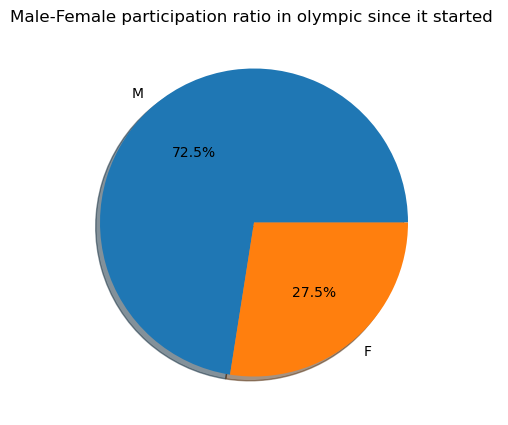

In [23]:
# Pie Chart of gender distribution of olympic participation
gender_counts = df.Sex.value_counts()
plt.figure(figsize=(10,5))
plt.title("Male-Female participation ratio in olympic since it started ")
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', shadow=True)
plt.show()

In [24]:
# Going one step further adding one more filter:
# Ratio of Male vs Female participant after 1950.

male_count = df['Sex'][df.Sex=='M'][df.Year>1950].count()
female_count = df['Sex'][df.Sex=='F'][df.Year>1950].count()
total_count = df.Sex.count()

male_ratio = int((male_count/total_count)*100)
female_ratio = int((female_count/total_count)*100)

print(f"Male to Female participation rate in olympic after 1950 is {male_ratio}:{female_ratio}")

Male to Female participation rate in olympic after 1950 is 56:26


In [25]:
# Male-Female participation ratio on each olympic and the gap between them.
Year = np.arange(1896,2017,4).tolist()

for i in Year:
    male_count = df['Sex'][df.Sex=='M'][df.Year>i].count()
    female_count = df['Sex'][df.Sex=='F'][df.Year>i].count()
    male_ratio = int((male_count/total_count)*100)
    female_ratio = int((female_count/total_count)*100)
    gap = male_ratio - female_ratio
    try:
        venue = df.City[df.Year == i].unique()[0]
    except:
        venue = "Unknown"
    print(f"Male-Female ratio in {venue}({i}) is {male_ratio}:{female_ratio} and the gap is {gap}")    

Male-Female ratio in Athina(1896) is 72:27 and the gap is 45
Male-Female ratio in Paris(1900) is 71:27 and the gap is 44
Male-Female ratio in St. Louis(1904) is 71:27 and the gap is 44
Male-Female ratio in London(1908) is 69:27 and the gap is 42
Male-Female ratio in Stockholm(1912) is 67:27 and the gap is 40
Male-Female ratio in Unknown(1916) is 67:27 and the gap is 40
Male-Female ratio in Antwerpen(1920) is 66:27 and the gap is 39
Male-Female ratio in Paris(1924) is 64:27 and the gap is 37
Male-Female ratio in Amsterdam(1928) is 62:27 and the gap is 35
Male-Female ratio in Los Angeles(1932) is 61:26 and the gap is 35
Male-Female ratio in Berlin(1936) is 58:26 and the gap is 32
Male-Female ratio in Unknown(1940) is 58:26 and the gap is 32
Male-Female ratio in Unknown(1944) is 58:26 and the gap is 32
Male-Female ratio in London(1948) is 56:26 and the gap is 30
Male-Female ratio in Helsinki(1952) is 53:25 and the gap is 28
Male-Female ratio in Cortina d'Ampezzo(1956) is 51:25 and the gap

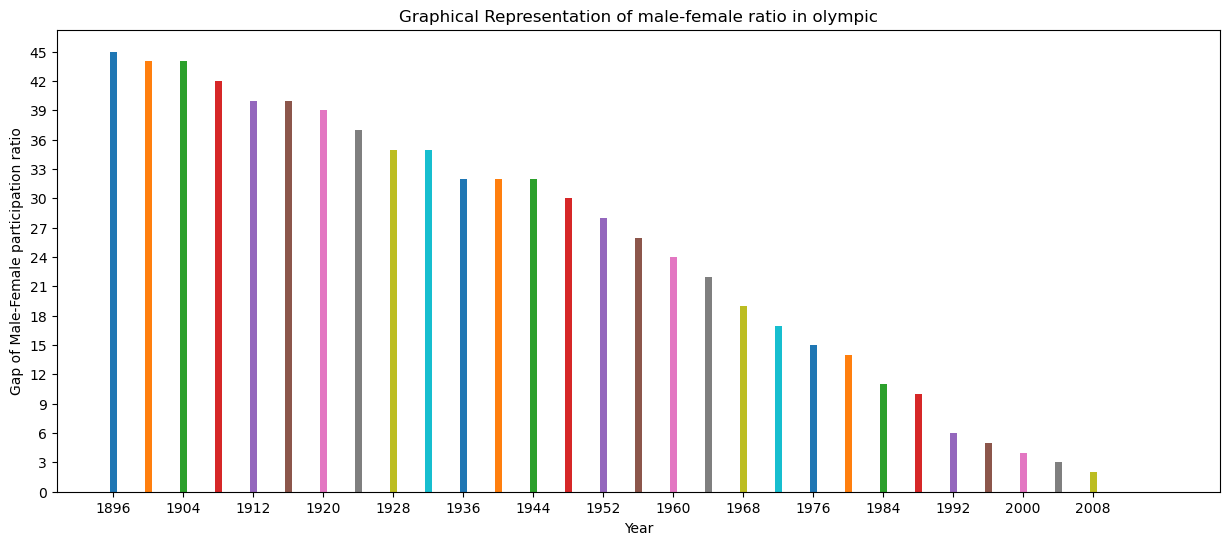

In [26]:
# Graphical Representation of male-female participation ratio in olympic since 1896.
plt.figure(figsize=(15,6))
plt.title("Graphical Representation of male-female ratio in olympic")
plt.xlabel('Year')
plt.ylabel('Gap of Male-Female participation ratio')
plt.yticks(np.arange(0,50,3))
plt.xticks(np.arange(1896,2016,8))
for i in Year:
    male_count = df['Sex'][df.Sex=='M'][df.Year>i].count()
    female_count = df['Sex'][df.Sex=='F'][df.Year>i].count()
    male_ratio = int((male_count/total_count)*100)
    female_ratio = int((female_count/total_count)*100)
    gap = male_ratio - female_ratio
    
    plt.bar(i,gap)
    
plt.show()

## Conclusion

- At the time when Olympics were started (in 1896) there was a large gap in male-female participation ratio i.e. 45
- With the male-female participation ratio keeps decreasing 
- In the year of 1952 the gap was around 25.
- By the end of 20th century the gap came to be 4-5
- In 2012, First time in the olympics history, the participation ratio of male-female participation became 0

In [27]:
#Find the total number of Female participant in each summer olympic.

female_athlete = df[(df.Sex=='F') & (df.Season=='Summer')][['Year','Sex']]
female_athlete = female_athlete.groupby('Year').count().reset_index()
female_athlete.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [28]:
# Graphical presentation of Female participant in each Summer Olympic.

female_athlete = df[(df.Sex=='F') & (df.Season=='Summer')][['Year', 'Sex']]
female_athlete = female_athlete.groupby('Year').count().reset_index()
female_athlete.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [29]:
# Graphical presentation of women participation in summer olympics 
women_summer_df = df[(df.Sex=='F') & (df.Season=='Summer')] 

Text(0.5, 1.0, 'Graphical presentation f women participation in summer olympics')

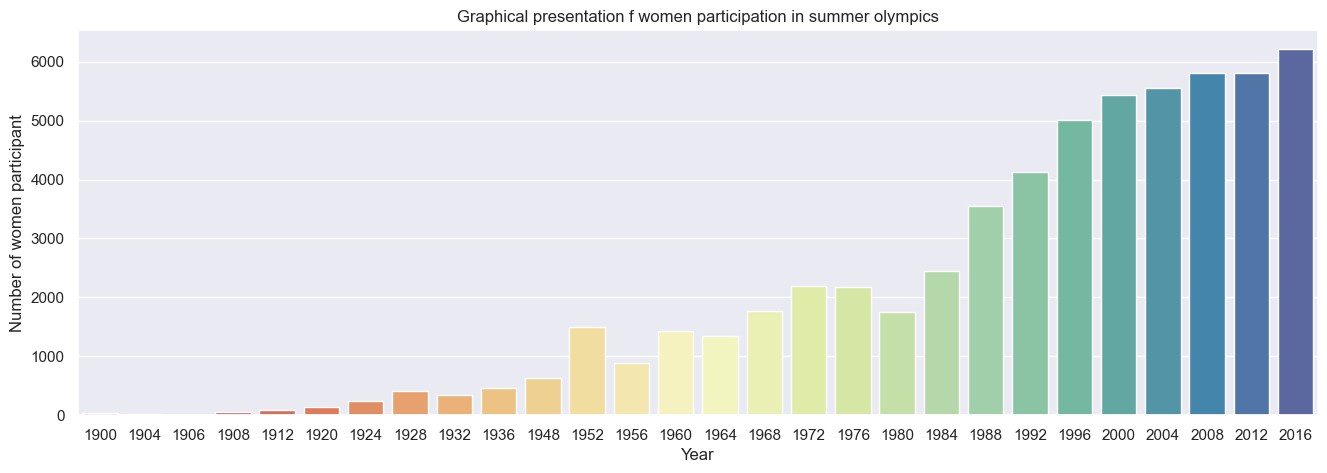

In [30]:
sns.set(style='darkgrid')
plt.figure(figsize=(16,5))
sns.countplot(x='Year', data=women_summer_df, palette="Spectral")
plt.ylabel("Number of women participant")
plt.title("Graphical presentation f women participation in summer olympics")



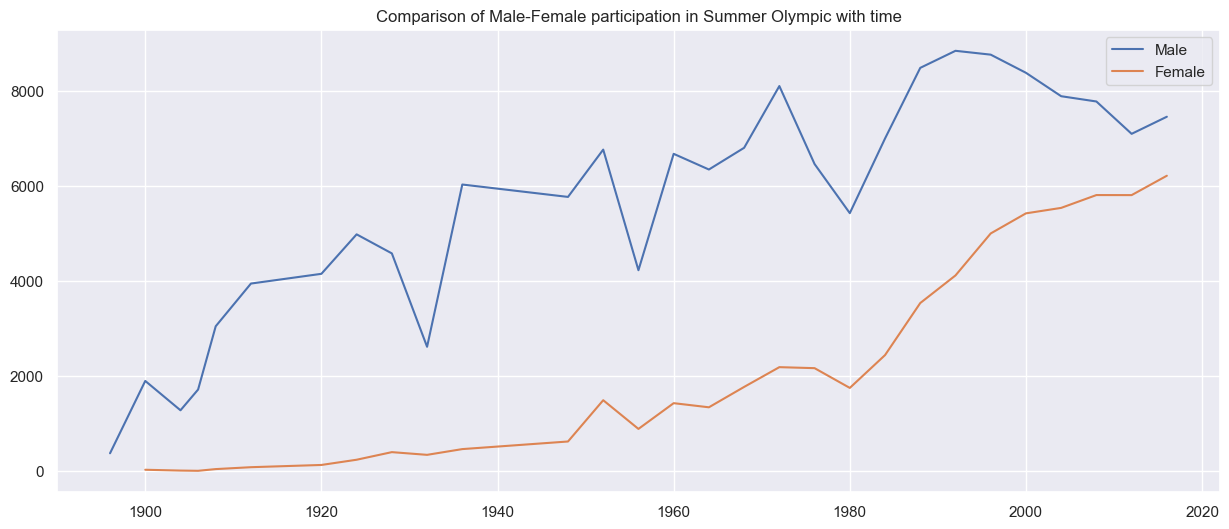

In [32]:
# Find the number of male participant in summer olympic yearwise
male_participant_yearwise = df[(df.Sex=='M')&(df.Season=='Summer')][['Sex','Year']]
male_participant_yearwise = male_participant_yearwise.groupby("Year").count()

# Find the number of female participant in summer olympic yearwise
female_participant_yearwise = df[(df.Sex=='F')&(df.Season=='Summer')][['Sex','Year']]
female_participant_yearwise = female_participant_yearwise.groupby("Year").count()

# Plotting a line graph for each group for comparison
plt.figure(figsize=(15,6))
plt.plot(male_participant_yearwise['Sex'],label="Male")
plt.plot(female_participant_yearwise['Sex'],label="Female")
plt.title("Comparison of Male-Female participation in Summer Olympic with time")
plt.legend()
plt.show()

In [38]:
# Top 10 countries with most number of medals

Top_countries_with_medals = df.groupby("Team")["Medal"].count().reset_index()
Top_countries_with_medals = Top_countries_with_medals.sort_values(by='Medal', ascending=False).head(10)

Top_countries_with_medals

,Team,Medal
1095,United States,5219
976,Soviet Union,2451
398,Germany,1984
412,Great Britain,1673
361,France,1550
506,Italy,1527
1010,Sweden,1434
65,Australia,1306
173,Canada,1243
476,Hungary,1127


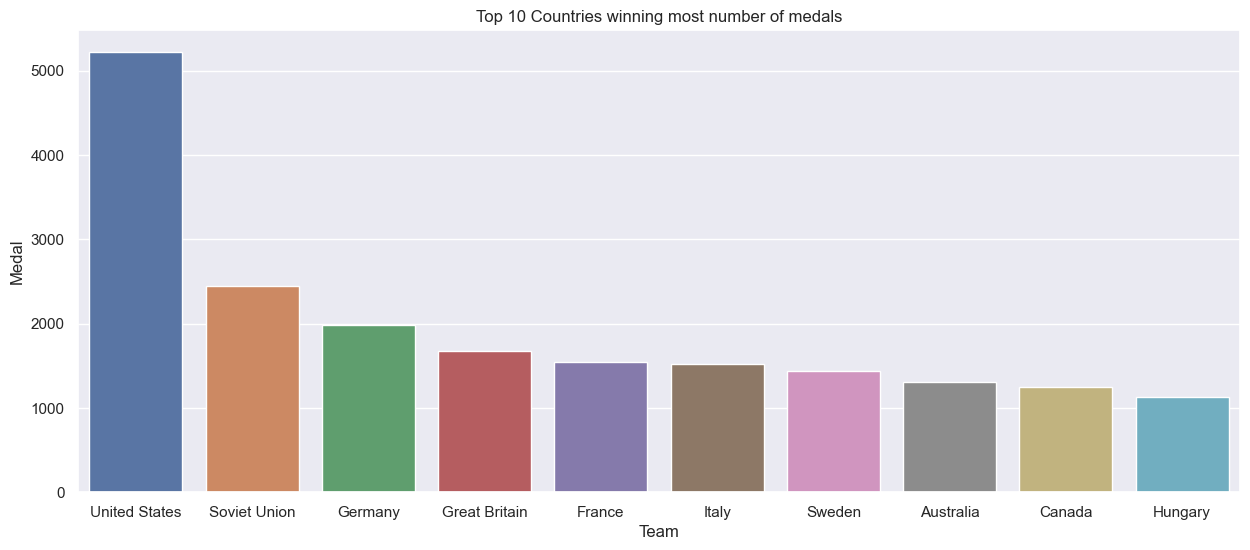

In [39]:
# Graphical Representation of Top 10 countries with most number of medals
plt.figure(figsize=(15,6))
plt.title("Top 10 Countries winning most number of medals")
sns.barplot(x=Top_countries_with_medals['Team'],y=Top_countries_with_medals['Medal'])
plt.show()